:# Proyek Analisis Data: Bike Sharing Datasets
- **Nama:** Zharfan Fasya Hidayat
- **Email:** zharfan.fasya@gmail.com
- **ID Dicoding:** M010B4KY4616


## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara perubahan cuaca dengan pengguna sepeda?
- Pola seperti apa yang dihasilkan oleh pengguna sepeda sepanjang perubahan musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour_df = pd.read_csv('/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- mengetahui data apa saja yang akan digunakan untuk dianalisa
- day_df menunjukan informasi terkait instant, dteday, season, yr, mnth, dll.
- hour_df menunjukan informasi terkait instant, dteday, season, yr, mnth, hr, dll.



### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Cek missing value yang ada di data
day_df.isna().sum()



,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
#Memeriksa Duplikasi dari kedua data

print("Jumlah duplikat:", day_df.duplicated().sum())
print("Jumlah duplikat:", hour_df.duplicated().sum())

Jumlah duplikat: 0
Jumlah duplikat: 0


In [ ]:
#mengetahui nilai statistik
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Mengetahui bahwa tidak ada missing value dari kedua dataset
- Jumlah duplikasi 0 sehingga dari kedua data ini tidak ada duplikasi yang terjadi
- Mengetahui nilai statistik dari masing-masing dataset
- Kedua data ini termasuk data yang berkualitas


### Cleaning Data

In [ ]:
# mengubah tipe data dteday dari object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
day_df.info()
print("+++++++++++++++++++++++++++++++++++++++++++++")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
#Merename kolom agar memudahkan ketika membaca
day_modif = day_df.rename(columns={'dteday': 'date_day', 'cnt': 'Total', 'yr': 'year', 'mnth': 'month','hr': 'hour', 'cnt': 'Total'})

hour_modif = hour_df.rename(columns={'dteday': 'date_day', 'cnt': 'Total', 'yr': 'year', 'mnth': 'month','hr': 'hour', 'cnt': 'Total'})


In [ ]:
#mengganti tipe data menjadi kategori
#SEASON
day_modif['season'] = day_modif['season'].astype('category')
hour_modif['season'] = hour_modif['season'].astype('category')

#WEATHER
day_modif['weathersit'] = day_modif['weathersit'].astype('category')
hour_modif['weathersit'] = hour_modif['weathersit'].astype('category')

In [ ]:
#mengubah nilai kolom yang numerik menjadi nama-nama musim/cuaca
#Season
day_modif['season'] = day_modif['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
hour_modif['season'] = hour_modif['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

#Weather
day_modif['weathersit'] = day_modif['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light Precipitation', 4: 'Heavy Precipitation'})
hour_modif['weathersit'] = hour_modif['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light Precipitation', 4: 'Heavy Precipitation'})

In [ ]:
day_modif.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Total
0,1,2011-01-01,Winter,0,1,0,6,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,1,0,0,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_modif.head()

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Total
0,1,2011-01-01,Winter,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengubah tipe data date_day dari object menjadi datetime
- Mengubah nama kolom agar lebih bisa dipahami
- Mengubah tipe data menjadi kategori
- Nilai kolom diganti menjadi bahasa yang mudah dipahami

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
col_season = day_modif[['season','casual','registered','Total']]
melt_season = pd.melt(col_season,id_vars='season', var_name='users',value_name= 'Daily Rental Count')
melt_season

,season,users,Daily Rental Count
0,Winter,casual,331
1,Winter,casual,131
2,Winter,casual,120
3,Winter,casual,108
4,Winter,casual,82
...,...,...,...
2188,Winter,Total,2114
2189,Winter,Total,3095
2190,Winter,Total,1341
2191,Winter,Total,1796


from matplotlib import pyplot as plt
melt_season['Daily Rental Count'].plot(kind='hist', bins=20, title='Daily Rental Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
melt_season.groupby('users').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
melt_season['Daily Rental Count'].plot(kind='line', figsize=(8, 4), title='Daily Rental Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(melt_season['users'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(melt_season, x='Daily Rental Count', y='users', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
col_weathersit = hour_modif[['weathersit','casual','registered','Total']]
melt_weathersit = pd.melt(col_weathersit,id_vars='weathersit', var_name='users',value_name= 'Daily Rental Count')

In [ ]:
hour_rental = hour_modif.groupby(by='hour')['Total'].mean()
hour_rental.head()

,Total
hour,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941


In [ ]:
month_rental = day_modif.groupby(by='month')['Total'].mean()
month_rental

,Total
month,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


**Insight:**
- menyederhanakan struktur data dan mempermudah eksplorasi tren penyewaan sepeda berdasarkan musim dan jenis pengguna.
- Pengelompokan Data Berdasarkan Situasi Cuaca
- Pengelompokan Data Berdasarkan Jam dan hari
- menghasilkan informasi mengenai rata-rata penyewaan sepeda per jam dalam sehari serta per hari dalam sebulan


## Visualization & Explanatory Analysis



```
# This is formatted as code
```

### Pertanyaan 1: Bagaimana korelasi antara perubahan cuaca dengan pengguna sepeda


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


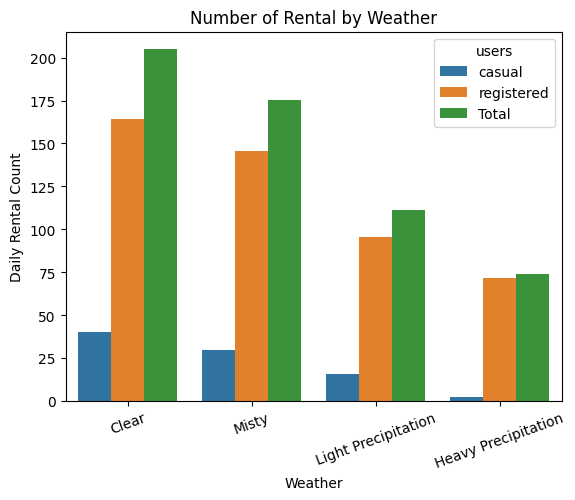

In [ ]:
sns.barplot(data=melt_weathersit, x="weathersit", y="Daily Rental Count", hue="users", errorbar=None)
plt.xticks(rotation=20)
plt.title('Number of Rental by Weather')
plt.xlabel('Weather')
plt.show()

### Pertanyaan 2: Pola seperti apa yang dihasilkan oleh pengguna sepeda sepanjang perubahan musim

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


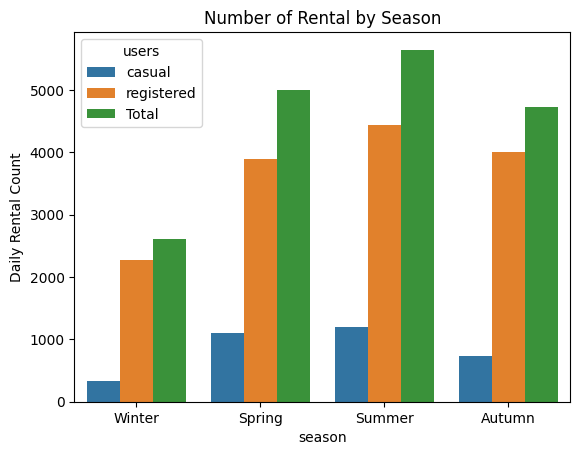

In [ ]:
sns.barplot(data=melt_season, x="season", y="Daily Rental Count", hue="users", errorbar=None)
plt.title('Number of Rental by Season')
plt.show()

**Insight:**
- Cuaca cerah dan berkabut mendorong peningkatan jumlah pengguna sepeda untuk semua kategori pengguna dibanding dengan cuaca mendung
- Pengguna registered lebih konsisten menggunakan sepeda sepanjang tahun dibanding pengguna kasual yang lebih terpengaruh oleh musim

## Analisis Lanjutan (Opsional)

In [ ]:
day_modif.to_csv("day_modif_df.csv", index=False)
hour_modif.to_csv("hour_modif_df.csv", index=False)
melt_season.to_csv("melt_season_df.csv", index=False)
melt_weathersit.to_csv("melt_weathersit_df.csv", index=False)

## Conclusion

- Conclution pertanyaan 1: Korelasi antara perubahan cuaca dengan penggunaan sepeda sangat signifikan. Pengguna sepeda lebih suka bersepeda ketika cuaca cerah dan menurun ketika cuaca curah hujan lebat.
- Conclution pertanyaan 2: Pola yang dihasilkan jumlah pengguna sepeda lebih tinggi ketika musim panas dan lebih menurun ketika musim hujan.
- Penyewaan sepeda akan lebih untung saat cuaca cerah dan saat musim panas